In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageChops
from scipy.fftpack import fft, fftshift, ifft
from skimage.transform import radon, rescale, iradon, rotate
from scipy.signal import hilbert, chirp

### Pregunta 2

In [2]:
img_no_at = np.load('scintigraphy_no_attenuation.npz')
img_at = np.load('scintigraphy_attenuation.npz')

In [3]:
fotones_no_at = img_no_at['u']
fotones_at = img_at['u']

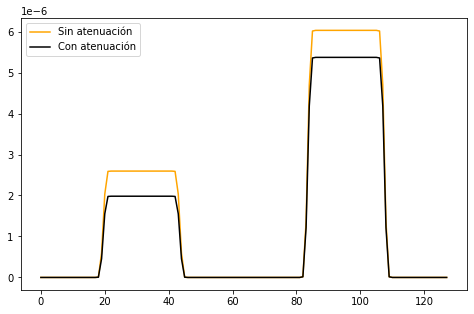

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (8, 5))

ax.plot(fotones_no_at, color = 'orange', label = 'Sin atenuación')
ax.plot(fotones_at, color = 'black', label = 'Con atenuación')

plt.legend()
plt.show()

In [17]:
# Se determina el coeficiente de atenuación como el promedio de los coeficientes de ambasa fuentes

mu = ((fotones_at[32] / fotones_no_at[32]) + (fotones_at[95] / fotones_no_at[95])) / 2

In [63]:
def fotones_ec(mu, z):
    return fotones_at * np.exp(-mu * z)

In [66]:
lista_z = np.linspace(-0.15,-0.25,5)

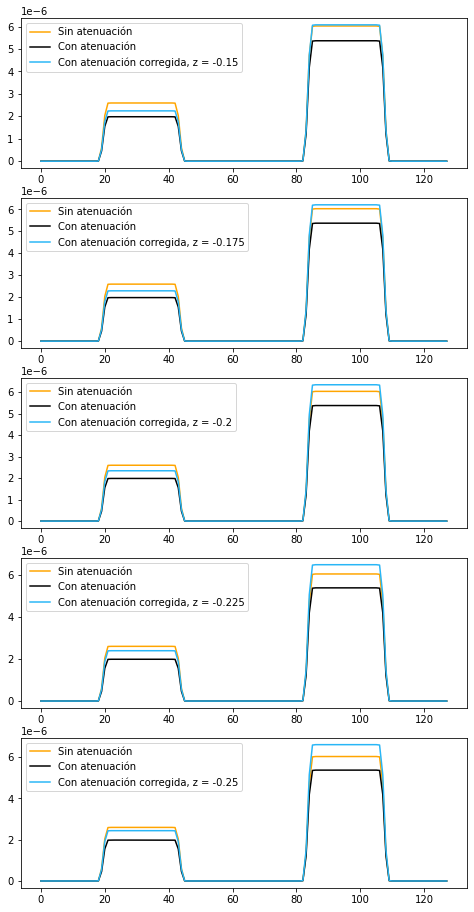

In [69]:
fig, ax = plt.subplots(5, 1, figsize = (8, 16))

for i in range(5):

    z0 = lista_z[i]
    fotones_corregidos = fotones_ec(mu, z0)
    
    ax[i].plot(fotones_no_at, color = 'orange', label = 'Sin atenuación')
    ax[i].plot(fotones_at, color = 'black', label = 'Con atenuación')
    ax[i].plot(fotones_corregidos, color = '#29b6f6', label = f'Con atenuación corregida, z = {z0}')

    ax[i].legend()

plt.show()

### Pregunta 3

In [5]:
sin_no_at = np.load('spect_no_attenuation.npz')
sin_at = np.load('spect_attenuation.npz')

In [6]:
fotones_sin_no_at = sin_no_at['u']
fotones_sin_at = sin_at['u']

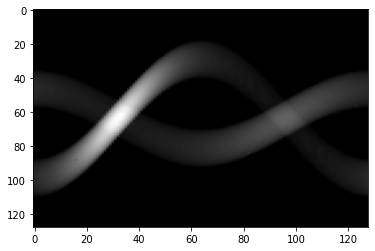

In [7]:
plt.imshow(fotones_sin_no_at, aspect = 'auto', cmap = 'gray')

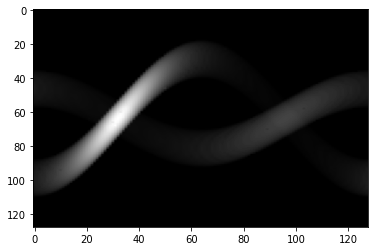

In [8]:
plt.imshow(fotones_sin_at, aspect = 'auto', cmap = 'gray')

[]

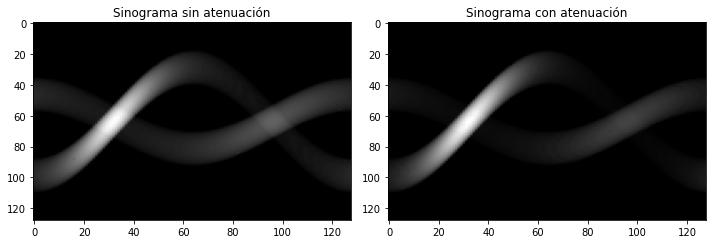

In [76]:
fig, ax = plt.subplots(1, 2, figsize = (10, 3.5))

ax[0].imshow(fotones_sin_no_at, cmap = 'gray', aspect = 'auto')
ax[0].set_title(f'Sinograma sin atenuación')
ax[1].imshow(fotones_sin_at, cmap = 'gray', aspect = 'auto')
ax[1].set_title(f'Sinograma con atenuación')

plt.tight_layout()
plt.plot()

In [9]:
theta = np.linspace(0., 360., 128, endpoint = False)

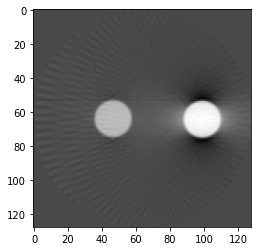

In [10]:
sinogram_no_at = iradon(fotones_sin_no_at, theta = theta, filter_name = 'ramp')
plt.imshow(sinogram_no_at, cmap = 'gray')

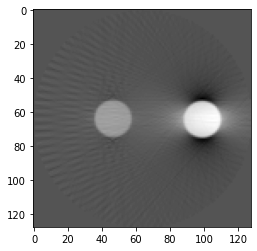

In [11]:
sinogram_at = iradon(fotones_sin_at, theta = theta, filter_name = 'ramp')
plt.imshow(sinogram_at, cmap = 'gray')

[]

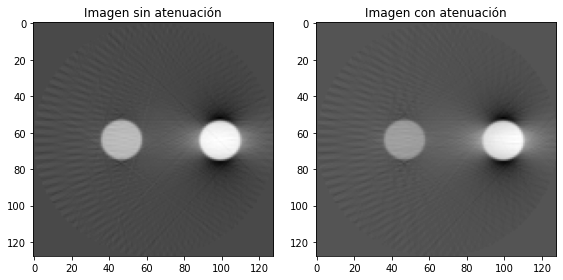

In [79]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4))

ax[0].imshow(sinogram_no_at, cmap = 'gray', aspect = 'auto')
ax[0].set_title(f'Imagen sin atenuación')
ax[1].imshow(sinogram_at, cmap = 'gray', aspect = 'auto')
ax[1].set_title(f'Imagen con atenuación')

plt.tight_layout()
plt.plot()